# **Data manipulation with Pandas: From loading file to data visualization**

<img src="https://static.wixstatic.com/media/a33eeb_5fdc385afc5449499004fdf1e871db95~mv2.png/v1/fill/w_420,h_235,al_c,lg_1,q_95/a33eeb_5fdc385afc5449499004fdf1e871db95~mv2.webp" alt="Pandas">

In [1]:
import pandas as pd

## **Loading files**

### **Json**

In [2]:
github = pd.read_json("https://api.github.com/users/hadley/orgs")
github.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   login               10 non-null     object
 1   id                  10 non-null     int64 
 2   node_id             10 non-null     object
 3   url                 10 non-null     object
 4   repos_url           10 non-null     object
 5   events_url          10 non-null     object
 6   hooks_url           10 non-null     object
 7   issues_url          10 non-null     object
 8   members_url         10 non-null     object
 9   public_members_url  10 non-null     object
 10  avatar_url          10 non-null     object
 11  description         8 non-null      object
dtypes: int64(1), object(11)
memory usage: 1.1+ KB


### **HTML**

In [3]:
world_population = pd.read_html('https://fr.wikipedia.org/wiki/Population_mondiale')
world_population[0]

,Zone géographique,Population,Pourcentage de lapopulation mondiale
0,Asie,4 679 661 000,"59,4 %"
1,Afrique,1 373 486 000,"17,4 %"
2,Europe,747 747 000,"9,5 %"
3,Amérique latine et Caraïbes,659 744 000,"8,4 %"
4,États-Unis et Canada,371 108 000,"4,7 %"
5,Océanie,43 220 000,"0,5 %"
6,Monde,7 874 966 000,"100,0 %"


## **Handle missing data**

In [4]:
office_df = pd.read_csv("datasets/the_office_series.csv")
office_df['GuestStars'].isna().head()

0    True
1    True
2    True
3    True
4    True
Name: GuestStars, dtype: bool

In [5]:
office_df['GuestStars'].isna().sum()

159

In [6]:
office_df['GuestStars'].fillna('No value').head(10)

0        No value
1        No value
2        No value
3        No value
4        No value
5       Amy Adams
6        No value
7        No value
8    Nancy Carell
9       Amy Adams
Name: GuestStars, dtype: object

In [7]:
available_guest = office_df.loc[:,'GuestStars'].dropna()
available_guest.head()

5        Amy Adams
8     Nancy Carell
9        Amy Adams
12     Tim Meadows
14       Ken Jeong
Name: GuestStars, dtype: object

## **Manipulation of string data**

In [8]:
available_guest.str.match('Amy Adams').head()

5      True
8     False
9      True
12    False
14    False
Name: GuestStars, dtype: bool

In [9]:
available_guest.str.upper().head()

5        AMY ADAMS
8     NANCY CARELL
9        AMY ADAMS
12     TIM MEADOWS
14       KEN JEONG
Name: GuestStars, dtype: object

## **Joining Data**

In [10]:
director_df = office_df.groupby('Director')['EpisodeTitle'].agg(['count'])
director_df = director_df[director_df['count'] > 10 ].sort_values('count', ascending=False)
director_df

,count
Director,
Paul Feig,15
Randall Einhorn,15
Greg Daniels,13
Ken Kwapis,13
Jeffrey Blitz,11


In [11]:
director_mean_df = office_df.groupby('Director')['Ratings'].agg(['mean'])
director_mean_df.head()

,mean
Director,
Alex Hardcastle,7.40
Amy Heckerling,7.70
Asaad Kelada,8.00
B.J. Novak,7.92
Brent Forrester,7.90


In [12]:
new_df = pd.merge(director_df, director_mean_df, left_index=True, right_index=True)
new_df.sort_values('mean', ascending=False)

,count,mean
Director,,
Paul Feig,15,8.753333
Ken Kwapis,13,8.607692
Greg Daniels,13,8.446154
Jeffrey Blitz,11,8.309091
Randall Einhorn,15,8.113333


## **Visualization data**

In [13]:
# Function creation
def rangeGetData(column, df):
    return df[column].mean()

# Boolean mask trick to filter data
mean_viewers_19___27__2 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 19) & (office_df['Duration'] < 27.2)])
mean_ratings_19___27__2 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 19) & (office_df['Duration'] < 27.2)])

mean_viewers_27__2___35__4 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 27.2) & (office_df['Duration'] < 35.4)])
mean_ratings_27__2___35__4 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 27.2) & (office_df['Duration'] < 35.4)])

mean_viewers_35__4___43__6 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 35.4) & (office_df['Duration'] < 43.6)])
mean_ratings_35__4___43__6 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 35.4) & (office_df['Duration'] < 43.6)])

mean_viewers_43__6___51__8 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 43.6) & (office_df['Duration'] < 51.8)])
mean_ratings_43__6___51__8 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 43.6) & (office_df['Duration'] < 51.8)])

mean_viewers_51__8 = rangeGetData('Viewership', office_df[office_df['Duration'] >= 51.8])
mean_ratings_51__8 = rangeGetData('Ratings', office_df[office_df['Duration'] >= 51.8])

# Data frame creation
duration_df = pd.DataFrame(
    data={
        'viewers': [mean_viewers_19___27__2, mean_viewers_27__2___35__4, mean_viewers_35__4___43__6, mean_viewers_43__6___51__8, mean_viewers_51__8],
        'ratings': [mean_ratings_19___27__2, mean_ratings_27__2___35__4, mean_ratings_35__4___43__6, mean_ratings_43__6___51__8, mean_ratings_51__8]
        },
    index = ['19 to 27.2', '27.2 to 35.4', '35.4 to 43.6', '43.6 to 51.8', '51.8 to 60']
)

# Show data frame
duration_df

,viewers,ratings
19 to 27.2,6.704175,8.051456
27.2 to 35.4,7.811159,8.336232
35.4 to 43.6,7.384167,8.816667
43.6 to 51.8,7.055000,9.800000
51.8 to 60,15.045000,9.350000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

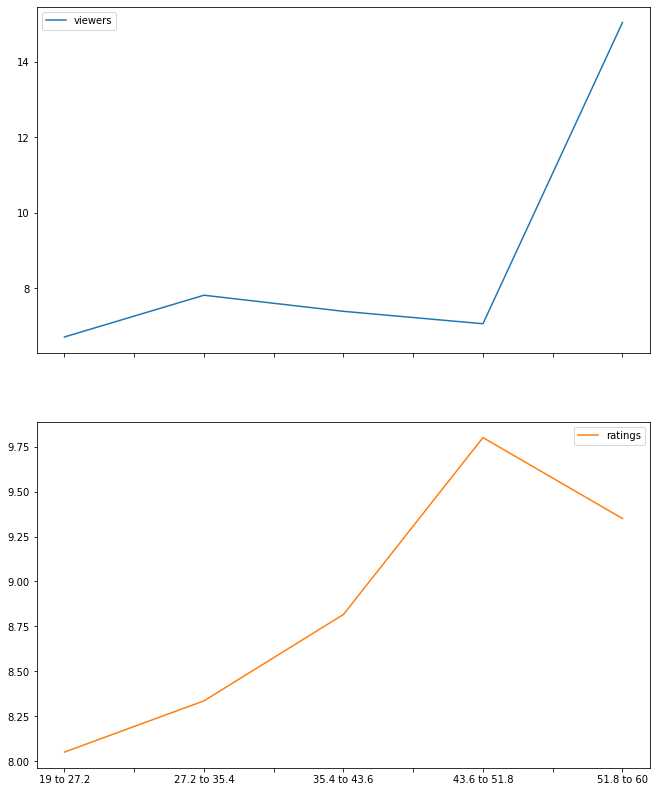

In [14]:
duration_df.plot.line(subplots=True, figsize=(11, 14))

array([<AxesSubplot:ylabel='viewers'>, <AxesSubplot:ylabel='ratings'>],
      dtype=object)

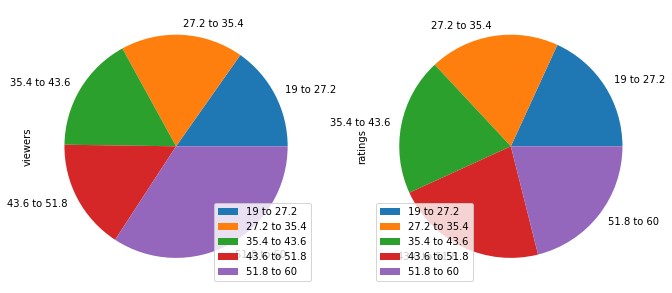

In [15]:
duration_df.plot(kind='pie',subplots=True, figsize=(11, 14))